(laser-cutting)=
# Fallstudie: Energiebilanz einer Laserschneidemaschine

:::{admonition} **Lernziele**
- Industrielle Anlagen auf Energiesparpotenziale hin untersuchen
- am Beispiel einer Laserschneidmaschine
- um auch andere spezialisierte industrielle Anlagen bewerten zu können
:::

## python konfigurieren

### Module importieren

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import shutil

print('Versionen der verwendeten python-Module: ')
print('matplotlib', matplotlib.__version__)
print('shutil', shutil)
print('pandas', pd.__version__)

Versionen der verwendeten python-Module: 
matplotlib 3.9.2
shutil <module 'shutil' from '/home/franzi/.pyenv/versions/miniconda3-latest/lib/python3.12/shutil.py'>
pandas 2.2.3


### Graphikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
if shutil.which('latex'): plt.rcParams['text.usetex'] = True

### Funktionen definieren

In [3]:
# define different color schemes according to:
# https://personal.sron.nl/~pault/#sec:qualitative

BRIGHT = ['#4477aa', '#66ccee', '#228833', '#ccbb44',
          '#ee6677', '#aa3377', '#bbbbbb']

HIGH_CONTRAST = ['#ffffff', '#ddaa33', '#bb5566', '#004488',
                 '#000000']

VIBRANT = ['#0077bb', '#33bbee', '#009988', '#ee7733',
          '#cc3311', '#ee3377', '#bbbbbb']

MUTED = ['#332288', '#88ccee', '#44aa99', '#117733',
         '#999933', '#ddcc77', '#cc6677', '#882255', '#aa4499',
         '#dddddd']

MEDIUM_CONTRAST = ['#ffffff', '#eecc66', '#ee99aa', '#6699cc',
                   '#997700', '#994455', '#004488', '#000000']

LIGHT = ['#77aadd', '#99ddff', '#44bb99', '#bbcc33',
         '#aaaa00', '#eedd88', '#ee8866', '#ffaabb', '#dddddd']

ALL_SCHEMES_KEYS = ['BRIGHT',
               'HIGH_CONTRAST',
               'VIBRANT',
               'MUTED',
               'MEDIUM_CONTRAST',
               'LIGHT']

ALL_SCHEMES_VALS = [BRIGHT,
                    HIGH_CONTRAST,
                    VIBRANT,
                    MUTED,
                    MEDIUM_CONTRAST,
                    LIGHT]

ALL_SCHEMES_DICT = dict(zip(ALL_SCHEMES_KEYS, ALL_SCHEMES_VALS))

def set_colors(scheme):
    if scheme not in ALL_SCHEMES_KEYS:
        raise ValueError(f"scheme not spported yet, needs to be either of\n\
        {[name for name in ALL_SCHEMES_KEYS]}")
    rcParams['axes.prop_cycle'] = cycler('color', ALL_SCHEMES_DICT[scheme])

## Wozu Laserschneiden?

:::{figure-md} laserschneiden
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Laserschneiden_Zahnradritel.jpg/512px-Laserschneiden_Zahnradritel.jpg" width="40%">

Aus 6 mm dickem Baustahl mit Laser geschnittenes Zahnradritzel [Florian Finster, [CC BY-SA 3.0](http://creativecommons.org/licenses/by-sa/3.0/&gt)]
:::

Das Bild zeigt ein Zahnradritzel, das aus 6 mm dickem Baustahl herausgelasert wurde.

Diese Fallstudie verzichtet auf das Recherchieren von Brancheninfos, da es hauptsächlich darum gehen soll, zu zeigen, wie man den Prozess optimieren kann.

## Funktionsprinzip

[Video auf wikipedia (Dauer ca. 1 Minute)](https://commons.wikimedia.org/wiki/File:Lasercutting-video.ogv)

Laserstrahlschneiden (oder auch Lasertrennen) ist ein abtragendes Trennverfahren, das thermische Prozesse zur Formgebung nutzt. Aufgrund der hohen erforderlichen Strahlleistung werden ausschließlich $\text {CO}_2$- oder $\text{Nd:YAG}$-Laser eingesetzt. Zum Lasertrennen metallischer Werkstoffe entstehen am Werkstück Strahlleistungen von $> 10^6\;\text{W}/\text{cm}^2$. Dies erreichen Linsen oder Spiegeln, die den Laserstrahl formen {cite:p}`dubbel_maschinen_2020`. Der Werkstoff absorbiert die Strahlleistung in Form von Wärme. Je nach Strahlleistung und Wechselwirkungszeit unterscheidet sich:
- beim __Schmelzschneiden__ *schmilzt* das Material lokal
- beim __Brennschneiden__ *verbrennt* das Material lokal
- beim __Sublimierschneiden__ *verdampft* das Material lokal

Koaxial zur optischen Achse des Laserstrahls schießt die Laserschneidanlage ein Schneidgas. Dieses treibt das abgetragene Material aus der Schnittfuge. Das Funktionsprinzip zeigt die folgende Abbildung (nach {cite:p}`dubbel_maschinen_2020`): 

![Prinzip des Lasertrennens](../img/laser_head.png)

Laserbrennschneiden verwendet als Schneidgas Sauerstoff. Dieser stellt durch eine exotherme Reaktion zusätzlich Energie bereit. Allerdings oxidiert Suaerstoff die Schnittfläche. Bei den anderen Laserschneidverfahren kommen hingegen nur inerte Gase (wie Argon und Stickstoff) zum Einsatz {cite:p}`dubbel_maschinen_2020`.

Die Laserschneidanlage bewegt Laserstrahl und Werkstück relativ zueinander, um eine kontinuierliche Schnittfuge zu erzeugen. Bei kleinen Werkstücken bewegt die Anlage das Werkstück, bei größeren Werkstücken hingegen den Laser. 

Die entstehenden Temperaturen können bei ungünstiger Prozessführung dazu führen, dass das Werkstück sich verbiegt. Außerdem ist für die **Qualität** des Prozesses wesentlich, die in der folgenden Abbildung gezeigten Parameter passend zur Anwendung zu erhalten {cite:p}`dubbel_maschinen_2020`:

![Qualität der Laserschnittfläche](../img/laser_quality.png)

Solche Informationen über einen Prozess sind wichtig, denn es reicht nicht, einfach Energie zu sparen, wenn das die Qualität zu sehr beeinträchtigt. Es lohnt sich jedoch, mit den Prozessingenieuren ins Gespräch zu kommen und Erfahrungswerte zu erhalten: Gibt es Daten über unterschiedliche Prozessvarianten, die auch Energieverbrauchsdaten beinhalten? Falls es solche Daten nicht gibt, ist es sinnvoll: 
1. an der Anlage Energieverbrauchsdaten messen - erst einmal, ohne den Prozess zu ändern - ergeben sich daraus unerklärliche Verbrauchswerte, Standbybedarfe, ...?
2. die physikalisch notwendige Energiemenge zu ermitteln (abzuschätzen), die die Anlage mindestens benötigt, um ihren Prozess zu fahren - wie viel geringer ist diese als die gemessene?
3. wenn ohnehin die Entwicklung eines neuen Prozesses ansteht, dann direkt bei allen Prozessparametervariationen zusätzlich die Energiedaten erfassen, um den Einfluss der Prozessparameter auf den Energiebedarf zu ermitteln - hier kann als sinnvoller Zeitraum bereits innerhalb einer Masterarbeit ein sinnvolles Ergebnis erreicht werden, falls gute Betreuung bezüglich der Laserschneidqualität gegeben ist
4. falls ein Feintuning der Parameter noch nicht passiert ist, kann der Einsatz von design of experiments (DOE) sinnvoll sein - dadurch sinkt die Zahl der Experimente und man kann durch schlaue Wahl der Parameter trotzdem etwas über die dazwischen liegenden nicht gemessenen Parametervariationen aussagen

Es ist nicht unbedingt nötig, alle vier Schritte durchzuführen. Es kann z. B. sein, dass der erste Schritt in Verbindung mit den folgenden Informationen schon interessante Ansatzpunkte liefert. Weitere Schritte müssen einer Aufwand-Nutzen-Abschätzung standhalten - lohnt sich der Aufwand für das zu erwartende Einsparpotenzial?

## Einsparpotentiale

{cite:p}`KELLENS2014854` analysiert die Ressourceneffizienz von Laserschneidprozessen nach der "ReCiPe Endpoint Europa H/A life cycle impact assessment method". Als Haupteffekte auf Ressourcennutzung nennen die Autoren folgende Punkte:
- Schneidenergie
- Schneidmaterial
- Restmaterial
- Luftbewegungsenergie
- Schneidgas

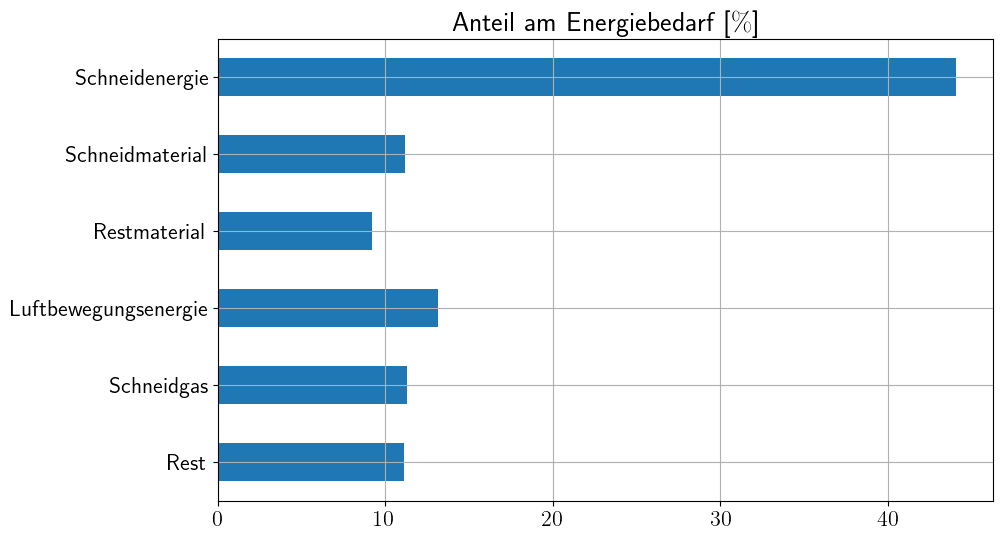

In [4]:
data = {'Energiebedarf': [44.05, 11.20, 9.21, 13.13, 11.30, 11.11]}

data = pd.DataFrame(data, index=['Schneidenergie','Schneidmaterial','Restmaterial','Luftbewegungsenergie','Schneidgas', 'Rest'])
ax = data.plot(kind='barh', title=r'Anteil am Energiebedarf [$\%$]', legend=None, grid=True);
ax.invert_yaxis()

{cite:p}`KELLENS2014854` unterscheidet drei Kategorien von Einsparpotenzialen:

![Einsparpotential-Dreieck](../img/laser_improvement_potential.svg)

Je nachdem, an welcher Stelle des Entwicklungsprozesses man steht, lassen sich die zugehörigen Parameter verändern: 
- bei kompletter Neuentwicklung eines Prozesses und Neuanschaffung einer Anlage ist es möglich, unterschiedliche Maschinen-Designs zu testen
- falls die Maschine bereits besteht und eine Neuentwicklung zu aufwendig scheint, ist es ggf. möglich, das bestehende Werkzeug gegen ein anderes auszutauschen und/oder die Schneidetechnologie zu wechseln (anderer Laser, anderes Schneidgas)
- falls dies wiederum nicht möglich erscheint, ist eine Änderung der Prozessparameter und die optimierte Ansteuerung von Maschinenkomponenten interessant

Es ist wichtig, Nutzen und Aufwand abzuschätzen: Eine Neuentwicklung bindet mehr personelle und investive Kapazitäten als ein Komponententausch. Die Prozessoptimierung kann in sich auch relativ aufwendig sein, weshalb Maschinen- und Werkzeugänderungen besonders bei neu zu entwickelnden Prozessen interessant erscheinen. 

### Konkretes Beispiel:

{cite:p}`Schmidt2018` zeigt mögliche Einsparpotentiale beim Laserschneiden: 
- Ein neuer Laserschneide-Roboter kann die Ausschussquote von $3{,}5\,\%$ auf $1$ bis $1{,}5\,\%$ reduzieren.
- Je nach Roboter spart dies bis zu $112\,\mathrm{MWh}\,\mathrm{a}^{-1}$ oder $60\,\%$ im Beispielprozess.

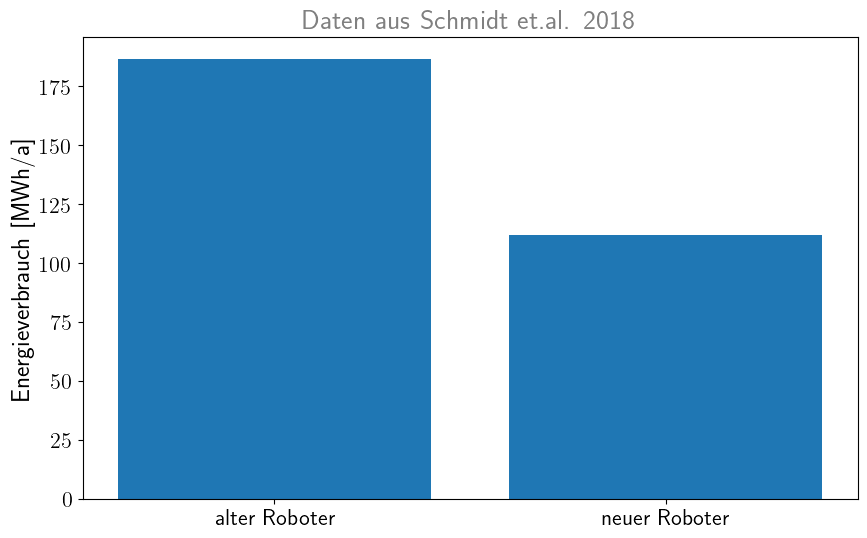

In [5]:
en_new = 112
sav = 0.6
en_old = 1 / sav * en_new

plt.bar(['alter Roboter', 'neuer Roboter'], [en_old, en_new])
plt.ylabel('Energieverbrauch [MWh/a]')
plt.title('Daten aus Schmidt et.al. 2018', color='gray')
plt.show()

:::{bibliography}
:filter: docname in docnames
:::